In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 33.1 MB/s eta 0:00:00


In [ ]:
!unzip wafer_dataset.zip -d /content


Archive:  wafer_dataset.zip
   creating: /content/Silicon Wafer.v9-69-image.yolo26/
  inflating: /content/Silicon Wafer.v9-69-image.yolo26/data.yaml  
  inflating: /content/Silicon Wafer.v9-69-image.yolo26/README.dataset.txt  
   creating: /content/Silicon Wafer.v9-69-image.yolo26/test/
   creating: /content/Silicon Wafer.v9-69-image.yolo26/test/images/
  inflating: /content/Silicon Wafer.v9-69-image.yolo26/test/images/Screenshot-2025-09-26-203721_png.rf.f8a588bdd1d235cdf48703a42f3aafd3.jpg  
  inflating: /content/Silicon Wafer.v9-69-image.yolo26/test/images/seg_die_-1-2-_subdie_5_pullouts_2_png.rf.8e1806162ffdc708746526c9082c974d.jpg  
  inflating: /content/Silicon Wafer.v9-69-image.yolo26/test/images/seg_die_-2-5-_subdie_0_dut_1_png.rf.a572c3cbac600f3009db4406e5c9b893.jpg  
   creating: /content/Silicon Wafer.v9-69-image.yolo26/test/labels/
  inflating: /content/Silicon Wafer.v9-69-image.yolo26/test/labels/Screenshot-2025-09-26-203721_png.rf.f8a588bdd1d235cdf48703a42f3aafd3.txt  
  i

In [ ]:
from ultralytics import YOLO

model = YOLO("yolo26n.pt")

results = model.train(data="/content/wafer/wafer_data.yaml", epochs=100, imgsz=640)


Ultralytics 8.4.9 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, angle=1.0, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/wafer/wafer_data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, end2end=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo26n.pt, momentum=0.937, mosaic=1.0, multi_scale=0.0, name=train3, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspectiv


image 1/1 /content/wafer/valid/images/die_-8-5-_subdie_4_pullouts_1_png.rf.21d93bd228384436b3d223337e892276.jpg: 640x640 1 Die, 16 Pad_3s, 9.7ms
Speed: 3.2ms preprocess, 9.7ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)
Results saved to /content/runs/detect/predict


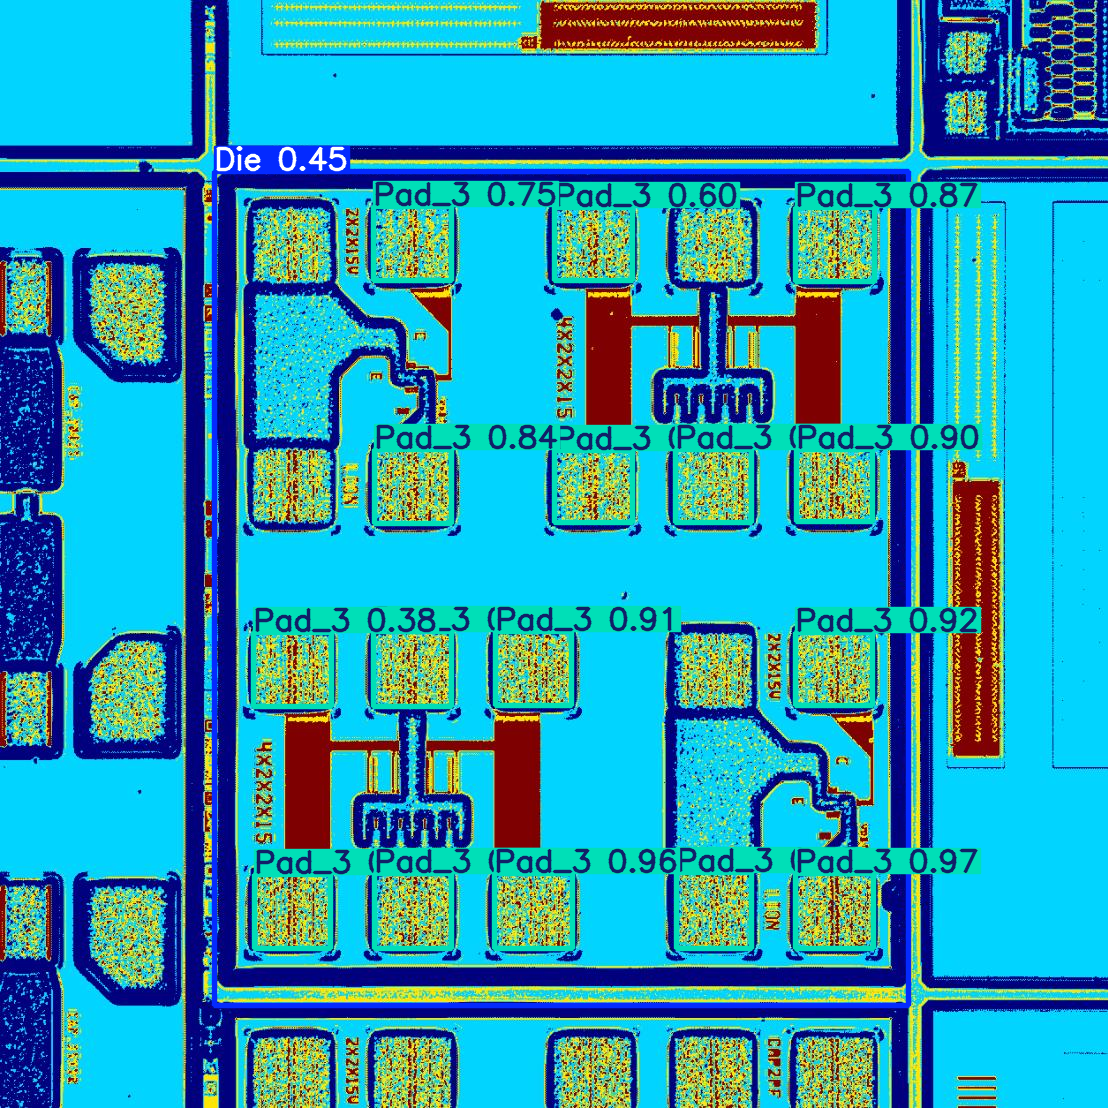

In [ ]:
# Load a model
# model = YOLO("yolo26n.pt")  # load an official model
model = YOLO("/content/runs/detect/train3/weights/best.pt")  # load a custom model

# Predict with the model
results = model("/content/wafer/valid/images/die_-8-5-_subdie_4_pullouts_1_png.rf.21d93bd228384436b3d223337e892276.jpg", conf=0.2, save=True)  # predict on an image

# Access the results
for result in results:
    xywh = result.boxes.xywh  # center-x, center-y, width, height
    xywhn = result.boxes.xywhn  # normalized
    xyxy = result.boxes.xyxy  # top-left-x, top-left-y, bottom-right-x, bottom-right-y
    xyxyn = result.boxes.xyxyn  # normalized
    names = [result.names[cls.item()] for cls in result.boxes.cls.int()]  # class name of each box
    confs = result.boxes.conf  # confidence score of each box
    result.show()
    result.save(filename="result.jpg")

In [ ]:
!pip install -U segment-anything


In [ ]:
# from ultralytics.data.annotator import auto_annotate

# auto_annotate(data="/content/wafer/valid/images/die_-8-5-_subdie_4_pullouts_1_png.rf.21d93bd228384436b3d223337e892276.jpg", det_model="/content/runs/detect/train3/weights/best.pt", sam_model='sam_b.pt')


In [37]:
import cv2
import torch
import numpy as np
# import matplotlib.pyplot as plt
import plotly.graph_objects as go
from ultralytics import YOLO
from segment_anything import sam_model_registry, SamPredictor


In [ ]:
!wget https://dl.fbaipublicfiles.com/segment_anything/sam_vit_b_01ec64.pth -O /content/sam_b.pt


--2026-01-31 18:00:38--  https://dl.fbaipublicfiles.com/segment_anything/sam_vit_b_01ec64.pth
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 3.163.189.51, 3.163.189.14, 3.163.189.108, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|3.163.189.51|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 375042383 (358M) [binary/octet-stream]
Saving to: ‘/content/sam_b.pt’

/content/sam_b.pt   100%[===================>] 357.67M  34.1MB/s    in 7.4s    

2026-01-31 18:00:46 (48.1 MB/s) - ‘/content/sam_b.pt’ saved [375042383/375042383]



In [ ]:
!ls -lh /content/sam_b.pt


-rw-r--r-- 1 root root 358M Apr  4  2023 /content/sam_b.pt



0: 640x640 3 Dies, 3 Pad_1s, 21 Pad_2s, 12.8ms
Speed: 3.8ms preprocess, 12.8ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


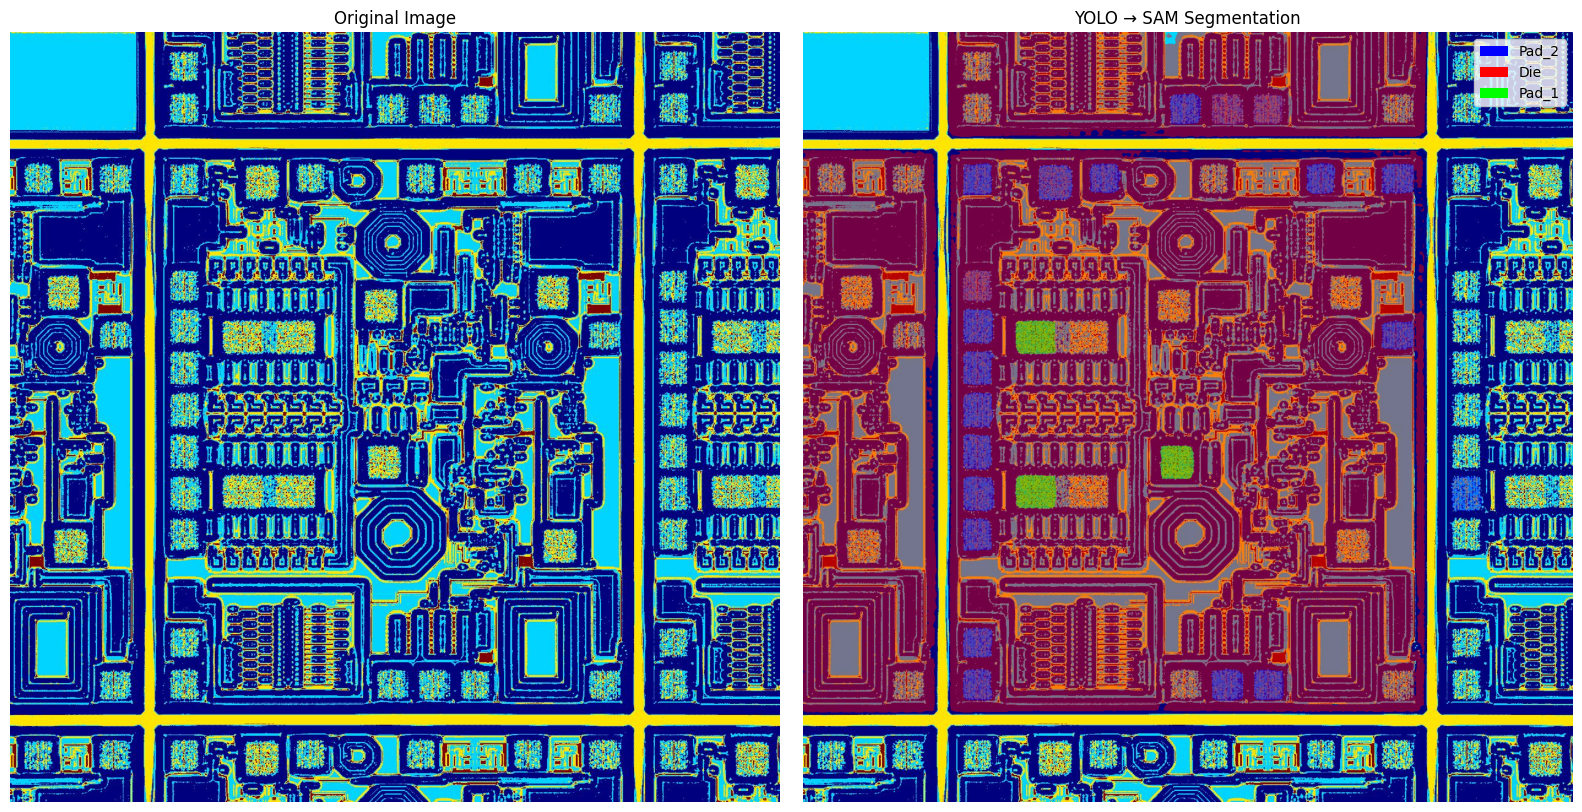

In [47]:
# Load your trained YOLO model
yolo = YOLO("/content/runs/detect/train3/weights/best.pt")

# Load SAM
sam = sam_model_registry["vit_b"](
    checkpoint="/content/sam_b.pt"
)
sam.to("cuda" if torch.cuda.is_available() else "cpu")

predictor = SamPredictor(sam)

# Load Image
img_path = "/content/wafer/test/images/seg_die_-2-5-_subdie_0_dut_1_png.rf.a572c3cbac600f3009db4406e5c9b893.jpg"

img_bgr = cv2.imread(img_path)
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

h, w, _ = img_rgb.shape
predictor.set_image(img_rgb)

# YOLO detection
results = yolo(img_rgb)[0]

boxes = results.boxes.xyxy.cpu().numpy()
classes = results.boxes.cls.cpu().numpy().astype(int)
names = yolo.names

# Pass YOLO boxes to SAM Segmentation
masks = []

for box in boxes:
    mask, _, _ = predictor.predict(
        box=box,
        multimask_output=False
    )
    masks.append(mask[0])

import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# Fixed colors per class (RGB 0–1)
CLASS_COLORS = {
    0: (1.0, 0.0, 0.0),   # Die
    1: (0.0, 1.0, 0.0),   # Pad_1
    2: (0.0, 0.0, 1.0),   # Pad_2
    3: (1.0, 1.0, 0.0),   # Pad_3
}

fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# -------------------------------
# Subplot 1: Original image
# -------------------------------
axes[0].imshow(img_rgb)
axes[0].set_title("Original Image")
axes[0].axis("off")

# -------------------------------
# Subplot 2: Segmentation overlay
# -------------------------------
axes[1].imshow(img_rgb)
axes[1].set_title("YOLO → SAM Segmentation")
axes[1].axis("off")

legend_patches = {}
alpha = 0.45

for mask, cls in zip(masks, classes):
    color = CLASS_COLORS.get(cls, (1, 1, 1))

    rgba = np.zeros((*mask.shape, 4))
    rgba[..., :3] = color
    rgba[..., 3] = mask * alpha   # transparent outside mask

    axes[1].imshow(rgba)

    if cls not in legend_patches:
        legend_patches[cls] = Patch(
            facecolor=color,
            label=names[cls]
        )

# Legend
axes[1].legend(
    handles=list(legend_patches.values()),
    loc="upper right"
)

plt.tight_layout()
plt.show()


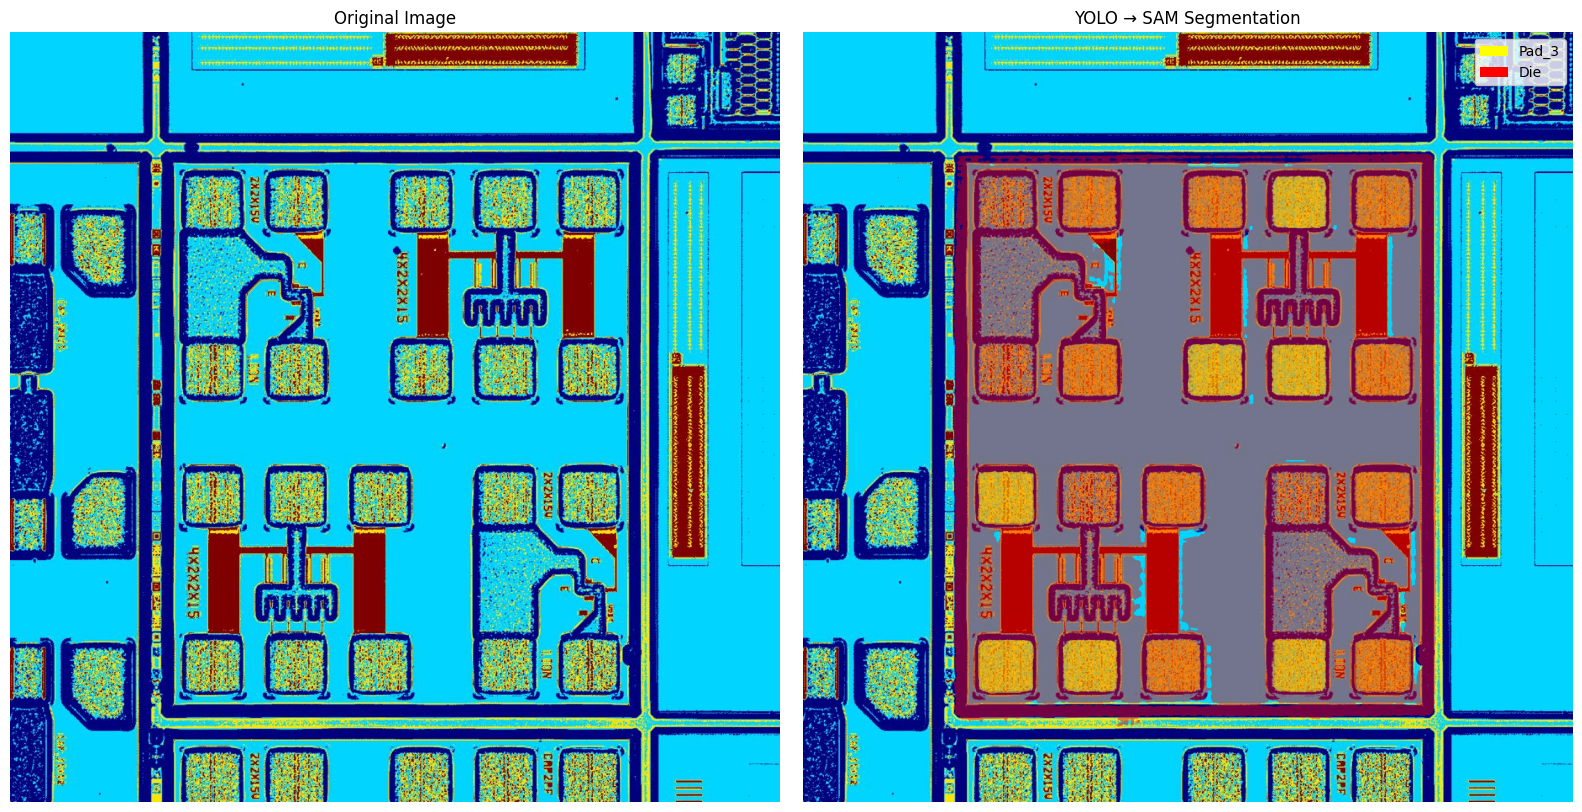